***"Pollution Pulse: Mapping India’s Air Quality Snapshot"***


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df= pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\AIR_QUALITY\dataset\air_quality.csv")
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Kanuru, Vijayawada - APPCB",04-04-2025 14:00:00,16.486692,80.699436,OZONE,20.0,32.0,21.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,SO2,10.0,13.0,11.0
2,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,CO,30.0,41.0,32.0
3,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",04-04-2025 14:00:00,16.554731,80.649110,NO2,14.0,18.0,15.0
4,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",04-04-2025 14:00:00,17.720000,83.300000,NO2,28.0,68.0,43.0


In [3]:
#basic inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3229 non-null   object 
 1   state          3229 non-null   object 
 2   city           3229 non-null   object 
 3   station        3229 non-null   object 
 4   last_update    3229 non-null   object 
 5   latitude       3229 non-null   float64
 6   longitude      3229 non-null   float64
 7   pollutant_id   3229 non-null   object 
 8   pollutant_min  3026 non-null   float64
 9   pollutant_max  3026 non-null   float64
 10  pollutant_avg  3026 non-null   float64
dtypes: float64(5), object(6)
memory usage: 277.6+ KB


In [4]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3229.000000,3229.000000,3026.000000,3026.000000,3026.00000
mean,22.154725,78.746203,22.024124,84.134171,47.08427
std,5.595920,4.945867,24.072022,93.823734,50.30609
min,8.514909,70.909168,1.000000,1.000000,1.00000
25%,18.910000,75.565602,5.000000,19.000000,12.00000
50%,23.016834,77.494094,14.000000,54.500000,31.00000
75%,26.786682,80.699436,31.000000,108.000000,62.00000
max,34.066206,94.636574,326.000000,500.000000,396.00000


In [5]:
# Impute missing values with column means
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Verify no missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16120\2345458275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [6]:
df.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [7]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

In [8]:
# Replace NA with NaN and convert to numeric
df[['pollutant_min', 'pollutant_max', 'pollutant_avg']] = df[['pollutant_min', 'pollutant_max', 'pollutant_avg']].replace('NA', pd.NA)
for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#drop rows with all  three pollutant values as NaN
df = df.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg'], how='all')

In [9]:
#Check duplicates
duplicates= df.duplicated(subset=['station','pollutant_id','last_update'])
print(f"Number of duplicates: {duplicates.sum()}")


Number of duplicates: 0


In [10]:
#Outlier check using z_score
pm25_avrage =df[df['pollutant_id']=='PM2.5']['pollutant_avg']
mean, std = pm25_avrage.mean() , pm25_avrage.std()
outliers= pm25_avrage[(pm25_avrage > mean + 3*std) | (pm25_avrage <mean - 3*std)]
print(f"Potential PM2.5 outliers: {outliers}")

Potential PM2.5 outliers: 6       316.0
533     351.0
1193    396.0
1418    299.0
1642    326.0
1906    256.0
2490    256.0
Name: pollutant_avg, dtype: float64


In [11]:
#checking for invalid geographic data
#geospatial validation
validlatitute =df['latitude'].between(8,37)  #India's latitude range
validlong= df['longitude'].between(68,97) # India's longitude range
print(f"Invalid coordinates: {((~validlatitute) | (~validlong)).sum()}")

Invalid coordinates: 0


In [12]:
#save the cleaned data to a new csv file
df.to_csv('../dataset/air_quality_cleaned.csv', index=False)
print("Cleaned data is  saved!")

Cleaned data is  saved!


In [13]:
df = pd.read_csv('../dataset/air_quality_cleaned.csv')
print("Data loaded successfully!")
df.head()

Data loaded successfully!


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Kanuru, Vijayawada - APPCB",04-04-2025 14:00:00,16.486692,80.699436,OZONE,20.0,32.0,21.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,SO2,10.0,13.0,11.0
2,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,CO,30.0,41.0,32.0
3,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",04-04-2025 14:00:00,16.554731,80.649110,NO2,14.0,18.0,15.0
4,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",04-04-2025 14:00:00,17.720000,83.300000,NO2,28.0,68.0,43.0


***# Objective 1: Analyze pollutant distribution across cities/states.***

In [14]:
#Summarize  pollutant distribution
pollutant_summary = df.groupby('pollutant_id')[['pollutant_avg']].agg(['mean', 'min','max','count'])
print("Pollutant summary statistics\n")
pollutant_summary


Pollutant summary statistics



pollutant_avg                      
                      mean  min        max count
pollutant_id                                    
CO               36.914706  2.0  129.00000   466
NH3               8.617365  1.0   47.08427   422
NO2              33.637473  1.0  179.00000   470
OZONE            47.616496  1.0  304.00000   455
PM10             96.090254  2.0  360.00000   476
PM2.5            80.267141  6.0  396.00000   479
SO2              20.681749  1.0  107.00000   461

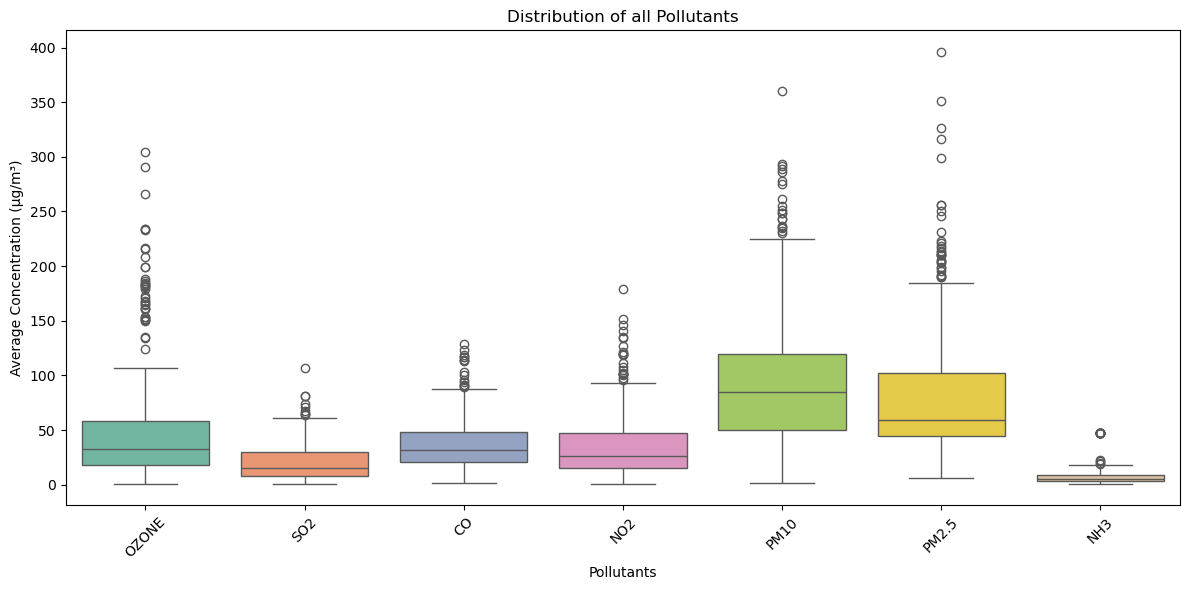

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='pollutant_id', y='pollutant_avg',hue='pollutant_id', data=df, palette='Set2', legend=False)
plt.title('Distribution of all Pollutants')
plt.xlabel('Pollutants')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
#Top and bottom PM2.5 cities
pm25_avg = df[df['pollutant_id'] == 'PM2.5'].groupby('city')['pollutant_avg'].mean().sort_values()
print("Lowest PM2.5 cities:\n", pm25_avg.head(5))
print("Highest PM2.5 cities:\n", pm25_avg.tail(5))

Lowest PM2.5 cities:
 city
Gadag             8.0
Tirupur          13.0
Palkalaiperur    14.0
Madikeri         15.0
Agartala         16.0
Name: pollutant_avg, dtype: float64
Highest PM2.5 cities:
 city
Hajipur          192.0
Greater Noida    201.0
Ghaziabad        241.5
Siliguri         256.0
Byrnihat         316.0
Name: pollutant_avg, dtype: float64


***Objective 2: Identifying worst air quality regions(Top 10 most polluted cities).***

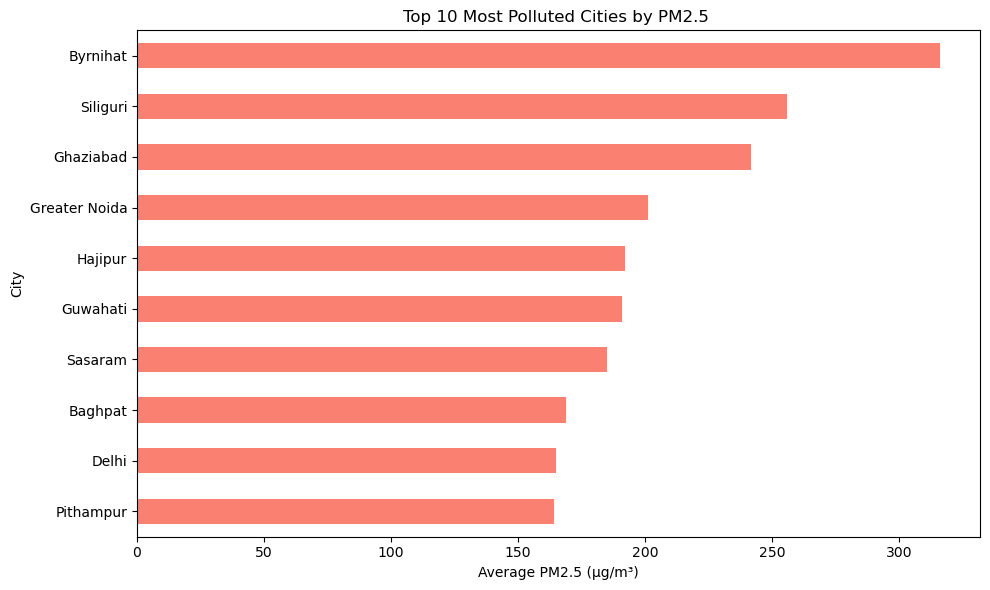

In [17]:
#Top 10 PM2.5 cities
pm25_avg = df[df['pollutant_id'] == 'PM2.5'].groupby('city')['pollutant_avg'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
pm25_avg.head(10).sort_values().plot(kind='barh', color='salmon')
plt.title('Top 10 Most Polluted Cities by PM2.5 ')
plt.xlabel('Average PM2.5 (µg/m³)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


***Objective 3: Compare air quality between northern and southern regions of India.***

In [18]:
#North vs. South comparison
north = ['Delhi', 'Uttar_Pradesh', 'Bihar', 'Haryana']
south = ['Karnataka', 'TamilNadu', 'Kerala', 'Andhra_Pradesh']
df['region']= df['state'].apply(lambda x: 'North' if x in north else ('South' if x in south else 'Other'))
pm25_region = df[df['pollutant_id']== 'PM2.5'].groupby('region')['pollutant_avg'].mean()
print("PM2.5 by region:\n", pm25_region)

PM2.5 by region:
 region
North    118.443196
Other     75.229176
South     38.256235
Name: pollutant_avg, dtype: float64


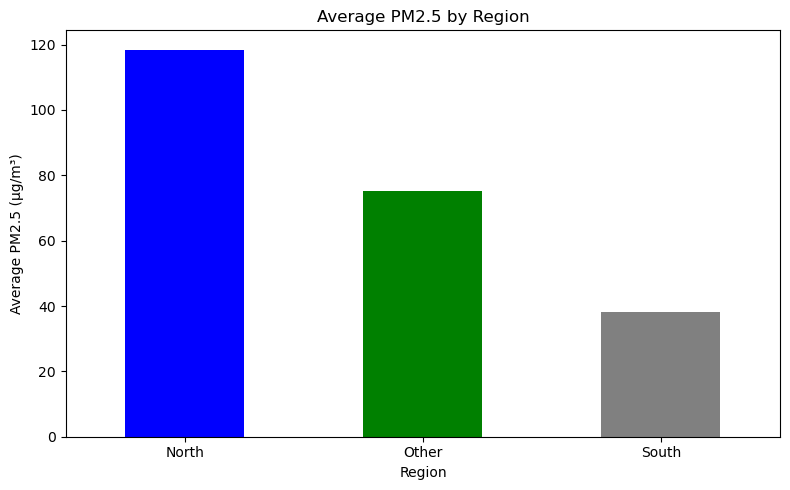

In [19]:
#regional PM2.5 comparison
plt.figure(figsize=(8,5))
pm25_region.plot(kind='bar', color=['blue','green', 'gray'])
plt.title('Average PM2.5 by Region')
plt.xlabel('Region')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



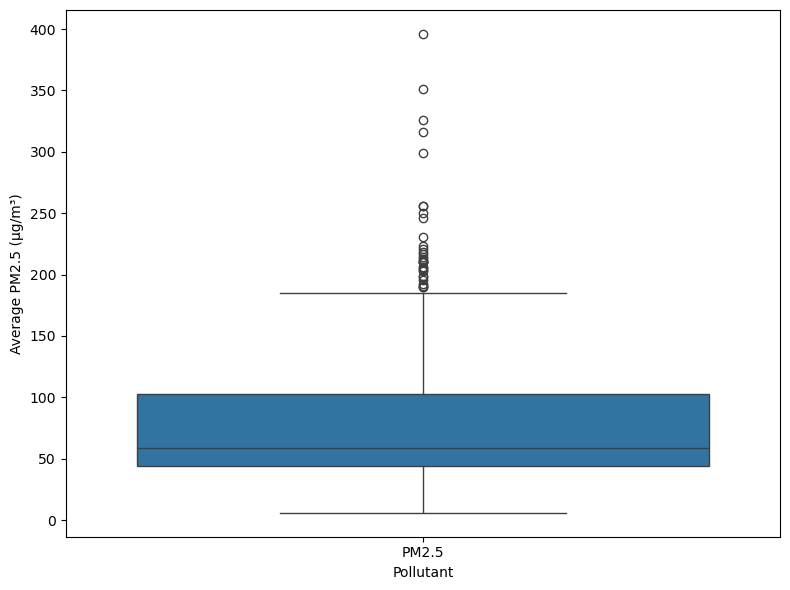

In [20]:
#PM2.5 variability across stations
plt.figure(figsize=(8,6))
sns.boxplot(x='pollutant_id', y='pollutant_avg',data= df[df['pollutant_id']=='PM2.5'])
plt.xlabel('Pollutant')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.tight_layout()
plt.show()


***Advanced Analysis and Mapping***

In [21]:
import folium


In [22]:
north =['Delhi', 'Uttar_Pradesh', 'Bihar', 'Haryana']
south= ['Karnataka', 'TamilNadu', 'Kerala', 'Andhra_Pradesh']
df['region'] = df['state'].apply(lambda x: 'North' if x in north else ('South' if x in south else 'Other'))
pm25_region_stats = df[df['pollutant_id'] == 'PM2.5'].groupby('region')['pollutant_avg'].agg(['mean', 'std', 'count'])
print("PM2.5 regional stats:\n", pm25_region_stats)

PM2.5 regional stats:
               mean        std  count
region                              
North   118.443196  71.214530    126
Other    75.229176  45.826806    271
South    38.256235  14.888434     82


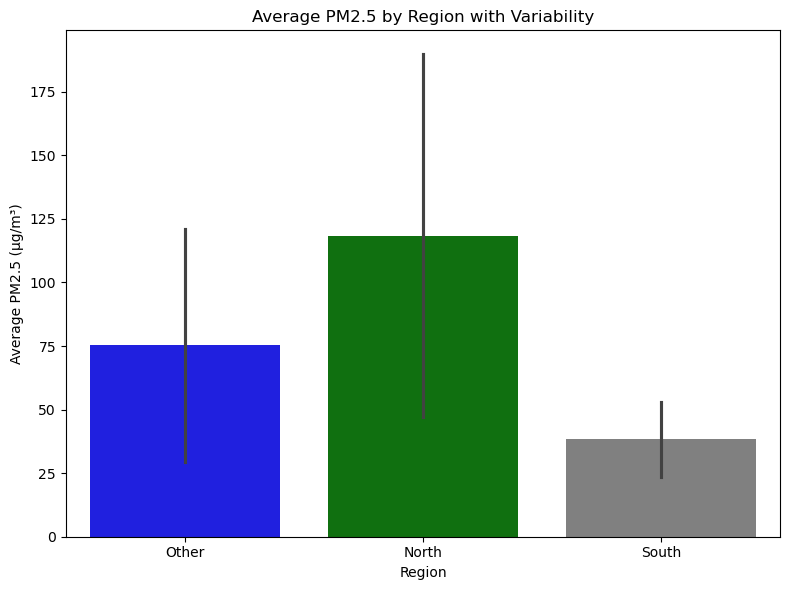

In [23]:
#regional comparison with error bars
plt.figure(figsize=(8,6))
sns.barplot(x='region', y='pollutant_avg', hue='region',data= df[df['pollutant_id']=='PM2.5'], errorbar='sd' , palette =['blue','green', 'gray'], legend = False)
plt.title('Average PM2.5 by Region with Variability')
plt.xlabel('Region')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.tight_layout()
plt.show()

***# Objective 4: Investigate correlations between different pollutants.***

In [24]:
#Pollutant correlations
pivotdf = df.pivot_table(index=['state', 'city', 'station'], columns='pollutant_id', values='pollutant_avg', aggfunc='mean')
corr = pivotdf.corr()
print("Correlation Matrix:\n")
corr

Correlation Matrix:



pollutant_id,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
pollutant_id,,,,,,,
CO,1.000000,-0.020975,0.301227,0.227803,0.347000,0.343563,0.091690
NH3,-0.020975,1.000000,0.284747,0.055636,-0.038135,0.002807,0.318789
NO2,0.301227,0.284747,1.000000,0.336291,0.488693,0.409075,0.167498
OZONE,0.227803,0.055636,0.336291,1.000000,0.367632,0.257526,0.027288
PM10,0.347000,-0.038135,0.488693,0.367632,1.000000,0.837724,0.067490
PM2.5,0.343563,0.002807,0.409075,0.257526,0.837724,1.000000,0.118111
SO2,0.091690,0.318789,0.167498,0.027288,0.067490,0.118111,1.000000


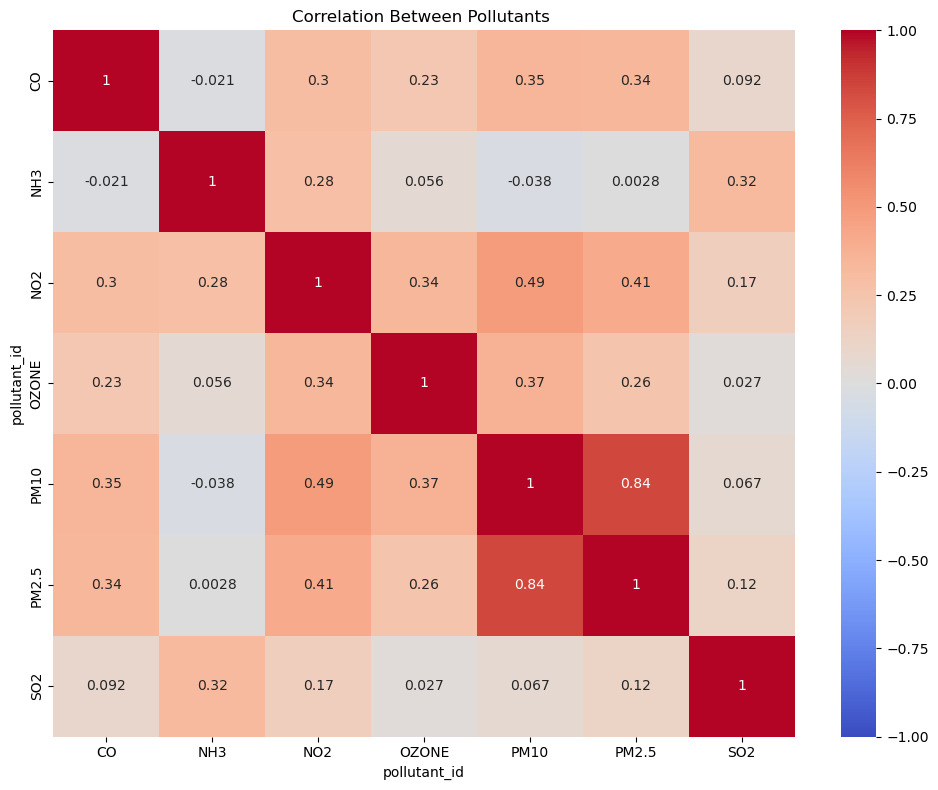

In [25]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Between Pollutants ')
plt.tight_layout()
plt.savefig('../outputs/corr_heatmap.png')
plt.show()

***Objective 5: Visualize the geographical distribution of pollution hotspots.***

In [26]:
#Mapping PM2.5 hotspots
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)  
pm25_data = df[df['pollutant_id'] == 'PM2.5'].dropna(subset=['latitude', 'longitude'])
for _, row in pm25_data.iterrows():
    color = 'red' if row['pollutant_avg'] > 100 else 'yellow' if row['pollutant_avg'] > 50 else 'green'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['city']}, {row['state']}: {row['pollutant_avg']} µg/m³"
    ).add_to(m)
m.save('../outputs/air_quality_map.html')
print("Map saved as 'air_quality_map.html' in outputs  folder")

Map saved as 'air_quality_map.html' in outputs  folder


In [27]:
from sklearn.preprocessing import MinMaxScaler


***Objective 6: Propose a simplified Air Quality Index (AQI) score for each city based on combined pollutant metrics.***

In [28]:
#Simplified AQI score
key_pollutants = ['PM2.5', 'PM10', 'NO2']
aqi_df = df[df['pollutant_id'].isin(key_pollutants)].pivot_table(index='city', columns='pollutant_id', values='pollutant_avg', aggfunc='mean')
#simple fill method "My approach i chose means over interpolation for simplicity"
aqi_df = aqi_df.fillna(aqi_df.mean())  
scaler = MinMaxScaler()
aqi_scaled = scaler.fit_transform(aqi_df)
#Feature engineering
aqi_df['AQI_Score'] = aqi_scaled.mean(axis=1) * 100  
print("Top 5 Cities by AQI Score:\n", aqi_df.sort_values('AQI_Score', ascending=False).head())

Top 5 Cities by AQI Score:
 pollutant_id          NO2        PM10       PM2.5  AQI_Score
city                                                        
Ghaziabad      105.750000  205.500000  241.500000  83.355765
Greater Noida  108.000000  197.500000  201.000000  78.376833
Byrnihat        15.000000  225.000000  316.000000  70.133333
Delhi           80.745751  206.514981  164.927398  68.552603
Siliguri        24.000000  212.000000  256.000000  64.096628


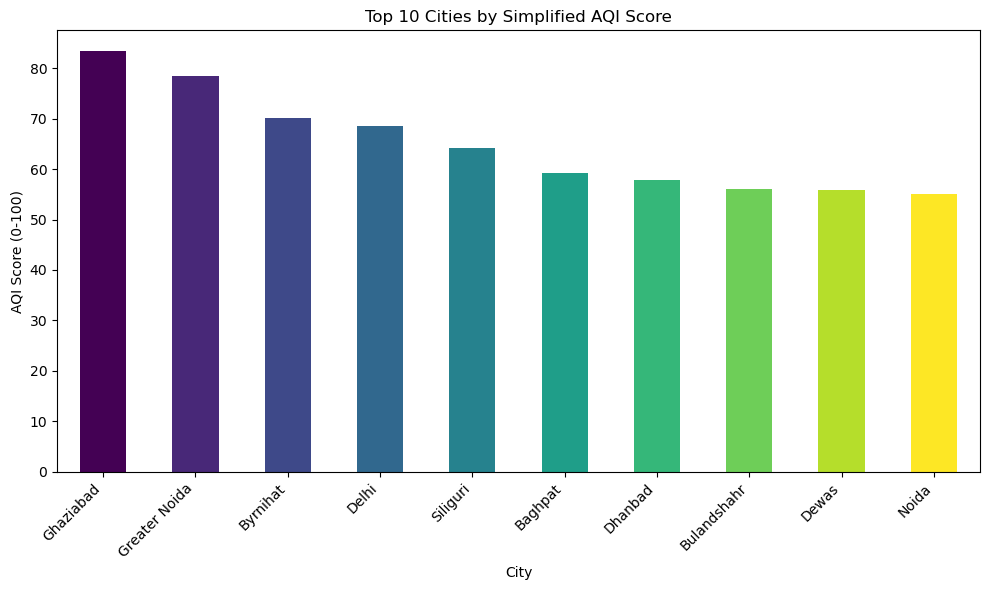

In [29]:
#Top 10 AQI cities
plt.figure(figsize=(10, 6))
aqi_df['AQI_Score'].sort_values(ascending=False).head(10).plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, 10)))
plt.title('Top 10 Cities by Simplified AQI Score')
plt.xlabel('City')
plt.ylabel('AQI Score (0-100)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
#Infer location types from station names
df['location_type'] = df['station'].apply(
    lambda x: 'Industrial' if 'Zone' in str(x) or 'Plant' in str(x) 
    else 'Urban' if 'Nagar' in str(x) or 'Colony' in str(x) 
    else 'Other'
)
pm25_by_type = df[df['pollutant_id'] == 'PM2.5'].groupby('location_type')['pollutant_avg'].agg(['mean', 'count'])
print("PM2.5 by location type:\n", pm25_by_type)

PM2.5 by location type:
                     mean  count
location_type                  
Industrial     42.042135      2
Other          81.522516    379
Urban          76.192272     98


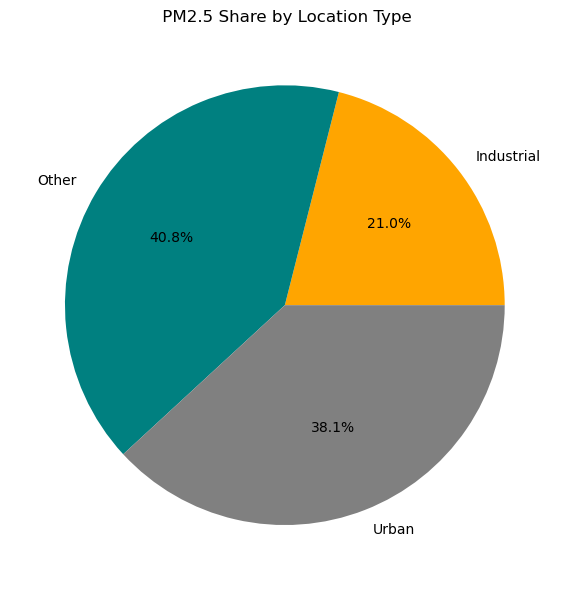

In [31]:
#PM2.5 by location type

pm25_by_type = df[df['pollutant_id'] == 'PM2.5'].groupby('location_type')['pollutant_avg'].mean()
plt.figure(figsize=(8, 6))
plt.pie(pm25_by_type, labels=pm25_by_type.index, colors=['orange', 'teal', 'gray'], autopct='%1.1f%%')
plt.title(' PM2.5 Share by Location Type')
plt.tight_layout()

plt.show()